In [34]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image

## Read data

In [5]:
data = pd.read_csv('data/titanic.csv', index_col='PassengerId')
data = data.loc[:,('Pclass', 'Fare', 'Age', 'Sex', 'Survived')].dropna(axis = 0)
data.head()

,Pclass,Fare,Age,Sex,Survived
PassengerId,,,,,
1,3,7.2500,22,male,0
2,1,71.2833,38,female,1
3,3,7.9250,26,female,1
4,1,53.1000,35,female,1
5,3,8.0500,35,male,0


In [6]:
X = data.loc[:,('Pclass', 'Fare', 'Age', 'Sex')]
X['Sex'] = X['Sex'] == 'male'
X.describe()

,Pclass,Fare,Age,Sex
count,714.000000,714.000000,714.000000,714
mean,2.236695,34.694514,29.699118,0.634454
std,0.838250,52.918930,14.526497,0.481921
min,1.000000,0.000000,0.420000,False
25%,1.000000,8.050000,20.125000,0
50%,2.000000,15.741700,28.000000,1
75%,3.000000,33.375000,38.000000,1
max,3.000000,512.329200,80.000000,True


In [7]:
y = data.loc[:,('Survived')]
y.describe()

count    714.000000
mean       0.406162
std        0.491460
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

## Train decision tree

In [24]:
clf = DecisionTreeClassifier(random_state=241, max_depth = 7)

In [25]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [26]:
clf.feature_importances_

array([ 0.21179725,  0.18279964,  0.15407057,  0.45133253])

In [42]:
clf.predict_proba([
        [3, 7.2500, 22, True],
        [1, 71.2833, 38, False],
        [1, 7., 20, False],
        [1, 500, 48, True],
])

array([[ 0.89247312,  0.10752688],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ]])

## Visualize

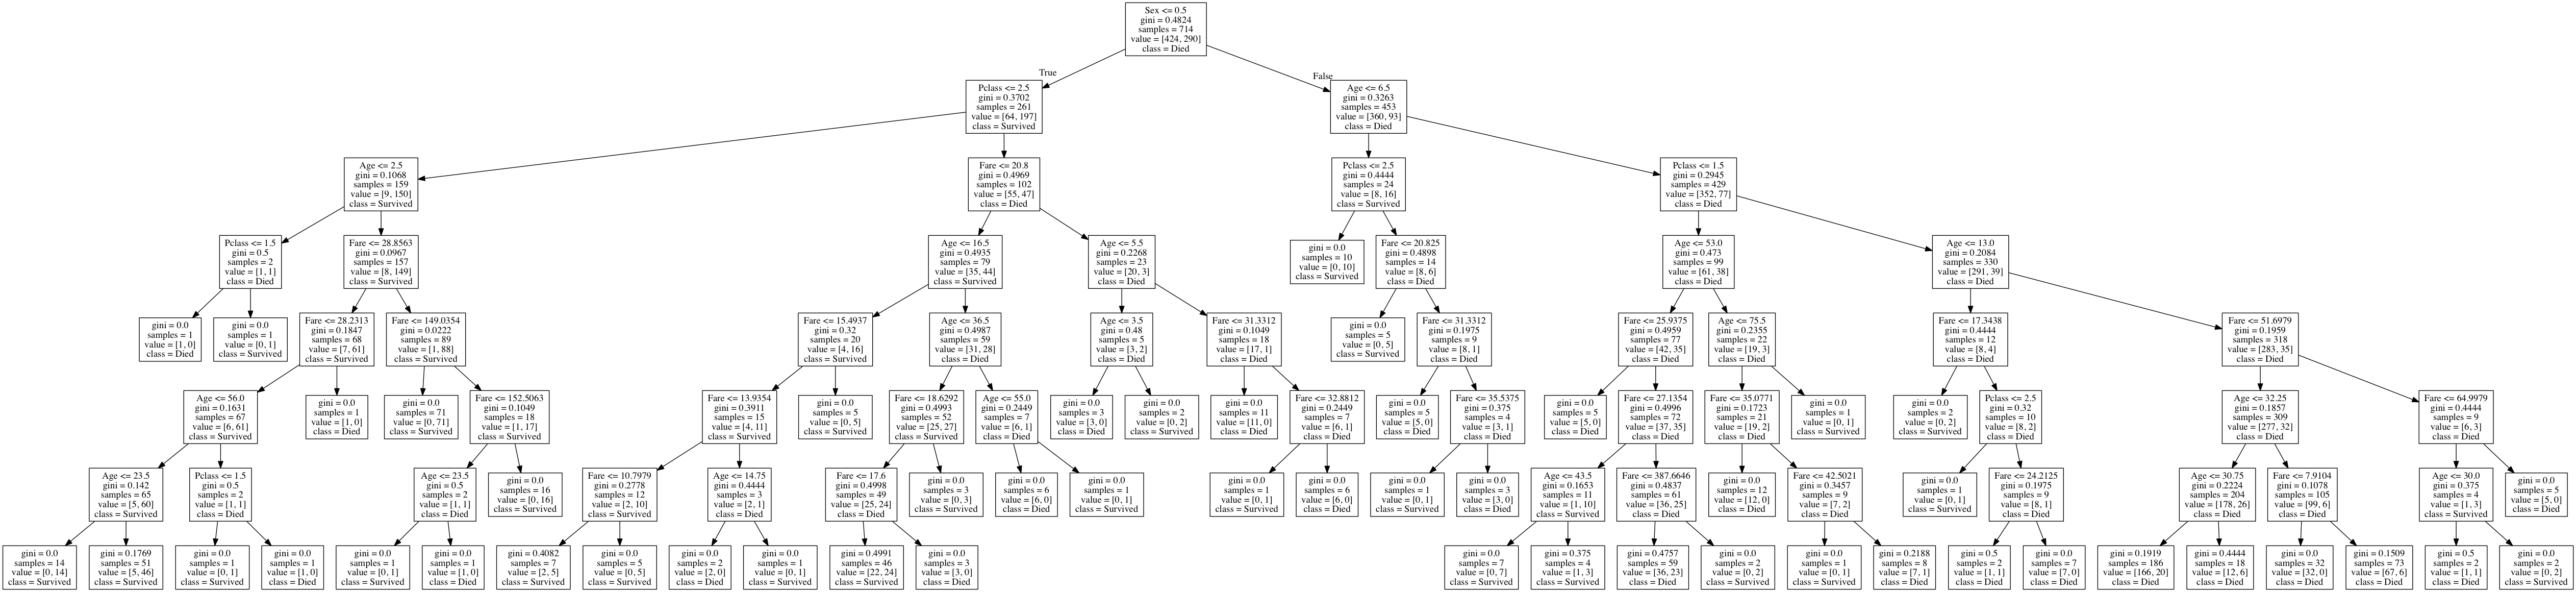

In [43]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names = X.columns, class_names = {0: 'Died', 1: 'Survived'}) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())  